<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks with using:</li>
different layers, activation functions, neurans per layers, number of layers
<li>train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/VNP/covid_impact_on_airport_traffic.csv')
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [4]:
data.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [5]:
data['AggregationMethod'].value_counts()

Daily    7247
Name: AggregationMethod, dtype: int64

In [6]:
data['Version'].value_counts()

1.0    7247
Name: Version, dtype: int64

In [7]:
data['Country'].value_counts()

United States of America (the)    4441
Canada                            2311
Australia                          257
Chile                              238
Name: Country, dtype: int64

In [8]:
# We can drop the columns "AggregationMethod" and "Version" since they don't affect the dataset in any way.
data = data.drop(['AggregationMethod','Version'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Country']=encoder.fit_transform(data['Country'].to_numpy().reshape(-1,1))
encoder.classes_

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Australia', 'Canada', 'Chile', 'United States of America (the)'],
      dtype=object)

In [10]:
data.head()

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,0,"POLYGON((151.164354085922 -33.9301772341877, 1..."


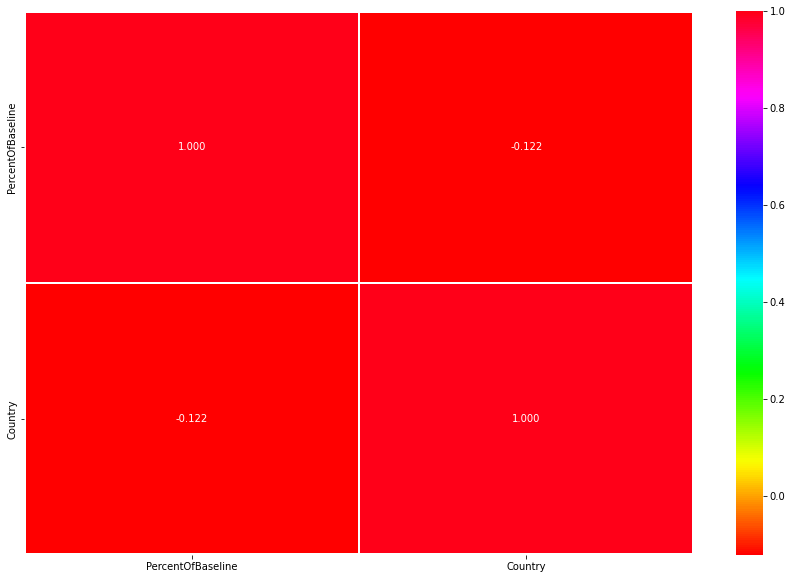

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


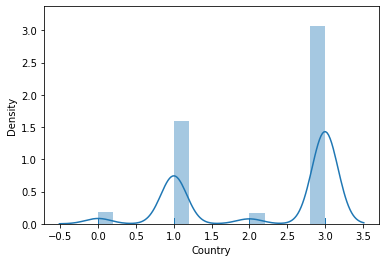

In [12]:
sns.distplot(data['Country'], rug=True)
plt.show()

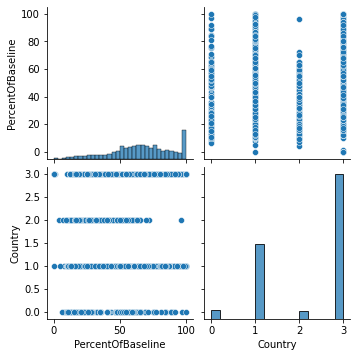

In [13]:
sns.pairplot(data)

In [14]:
from sklearn.model_selection import train_test_split

#Target column is the Country, that's what we're trying to predict based on PercentOfBaseline
#Since the target column has a categorical value, we use classification instead of regression
x = data['PercentOfBaseline']
y = data['Country']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train.to_numpy().reshape(-1,1))
X_test = sc.transform(X_test.to_numpy().reshape(-1,1))

# First NN

In [16]:
#Note: First, we choose a sequential model.
#Note: Second, we choose the layers to be dense.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#Note: We add the layers to the model. The first layer is the input layer. The value 32 signifies the number of nodes in the layer, and the value 1 the number of input dimensions.
model.add(Dense(32, input_dim=1, kernel_initializer='uniform', activation='relu'))

#Note: We then add the hidden layers to the model.
#Note: The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
#Note: It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

#Note: We finally add the output layer. The value 1 signifies that we expect 1 output. We often use sigmoid activation when classifing.
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [17]:
#Note: We then compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [18]:
model.fit(X_train, Y_train, epochs=100, batch_size=8) 

Epoch 1/100
725/725 [==============================] - 5s 4ms/step - loss: -1669.0609 - accuracy: 0.3207
Epoch 2/100
725/725 [==============================] - 3s 4ms/step - loss: -50517.2031 - accuracy: 0.3207
Epoch 3/100
725/725 [==============================] - 3s 4ms/step - loss: -294630.8125 - accuracy: 0.3207
Epoch 4/100
725/725 [==============================] - 3s 4ms/step - loss: -918378.8125 - accuracy: 0.3207
Epoch 5/100
725/725 [==============================] - 2s 3ms/step - loss: -2096126.3750 - accuracy: 0.3207
Epoch 6/100
725/725 [==============================] - 1s 2ms/step - loss: -4004978.0000 - accuracy: 0.3207
Epoch 7/100
725/725 [==============================] - 1s 2ms/step - loss: -6804280.0000 - accuracy: 0.3207
Epoch 8/100
725/725 [==============================] - 1s 2ms/step - loss: -10654280.0000 - accuracy: 0.3207
Epoch 9/100
725/725 [==============================] - 1s 2ms/step - loss: -15748628.0000 - accuracy: 0.3207
Epoch 10/100
725/725 [===========

In [19]:
y_pred = model.predict(X_test) 
y_pred[0:10]

46/46 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [20]:
y_pred = y_pred.round() 
y_pred[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

accuracy of the model:  0.3117241379310345


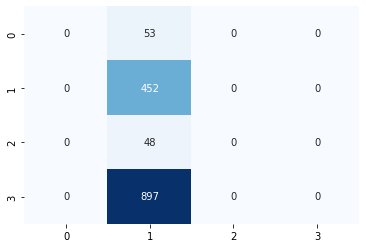

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ', ac)

# Second NN

In [22]:
#Note: First, we choose a sequential model.
#Note: Second, we choose the layers to be dense.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#Note: We add the layers to the model. The first layer is the input layer. The value 16 signifies the number of nodes in the layer, and the value 1 the number of input dimensions.
model.add(Dense(16, input_dim=1, kernel_initializer='uniform', activation='relu'))

#Note: We then add the hidden layers to the model.
#Note: It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
model.add(Dense(16, kernel_initializer='uniform', activation='softmax'))

#Note: We finally add the output layer. The value 1 signifies that we expect 1 output. We often use sigmoid activation when classifing.
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [23]:
#Note: We then compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [24]:
model.fit(X_train, Y_train, epochs=50, batch_size=5) 

Epoch 1/50
1160/1160 [==============================] - 2s 2ms/step - loss: -1.4512 - accuracy: 0.3207
Epoch 2/50
1160/1160 [==============================] - 2s 2ms/step - loss: -4.5960 - accuracy: 0.3207
Epoch 3/50
1160/1160 [==============================] - 2s 2ms/step - loss: -7.2445 - accuracy: 0.3207
Epoch 4/50
1160/1160 [==============================] - 2s 2ms/step - loss: -9.8879 - accuracy: 0.3207
Epoch 5/50
1160/1160 [==============================] - 2s 2ms/step - loss: -12.5459 - accuracy: 0.3207
Epoch 6/50
1160/1160 [==============================] - 2s 2ms/step - loss: -15.1990 - accuracy: 0.3207
Epoch 7/50
1160/1160 [==============================] - 2s 2ms/step - loss: -17.8540 - accuracy: 0.3207
Epoch 8/50
1160/1160 [==============================] - 2s 2ms/step - loss: -20.5041 - accuracy: 0.3207
Epoch 9/50
1160/1160 [==============================] - 2s 2ms/step - loss: -23.1522 - accuracy: 0.3207
Epoch 10/50
1160/1160 [==============================] - 2s 2ms/step

In [25]:
y_pred = model.predict(X_test) 
y_pred[0:10]

46/46 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [26]:
y_pred = y_pred.round() 
y_pred[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

accuracy of the model:  0.3117241379310345


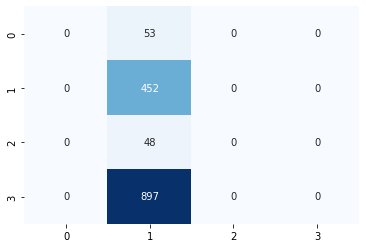

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ', ac)

# Third NN

In [28]:
#Note: First, we choose a sequential model.
#Note: Second, we choose the layers to be dense.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#Note: We add the layers to the model. The first layer is the input layer. The value 64 signifies the number of nodes in the layer, and the value 1 the number of input dimensions.
model.add(Dense(64, input_dim=1, kernel_initializer='uniform', activation='relu'))

#Note: We then add the hidden layers to the model.
#Note: It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))

#Note: We finally add the output layer. The value 1 signifies that we expect 1 output. We often use sigmoid activation when classifing.
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [29]:
#Note: We then compile the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [30]:
model.fit(X_train, Y_train, epochs=60, batch_size=10) 

Epoch 1/60
580/580 [==============================] - 2s 2ms/step - loss: -373.8723 - accuracy: 0.3207
Epoch 2/60
580/580 [==============================] - 1s 2ms/step - loss: -5783.4722 - accuracy: 0.3207
Epoch 3/60
580/580 [==============================] - 1s 2ms/step - loss: -23157.5586 - accuracy: 0.3207
Epoch 4/60
580/580 [==============================] - 1s 2ms/step - loss: -56855.3555 - accuracy: 0.3207
Epoch 5/60
580/580 [==============================] - 1s 2ms/step - loss: -109191.8906 - accuracy: 0.3207
Epoch 6/60
580/580 [==============================] - 1s 2ms/step - loss: -181830.7500 - accuracy: 0.3207
Epoch 7/60
580/580 [==============================] - 1s 2ms/step - loss: -276232.5938 - accuracy: 0.3207
Epoch 8/60
580/580 [==============================] - 1s 2ms/step - loss: -393616.0000 - accuracy: 0.3207
Epoch 9/60
580/580 [==============================] - 1s 2ms/step - loss: -535077.4375 - accuracy: 0.3207
Epoch 10/60
580/580 [==============================] 

In [31]:
y_pred = model.predict(X_test) 
y_pred[0:10]

46/46 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [32]:
y_pred = y_pred.round() 
y_pred[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

accuracy of the model:  0.3117241379310345


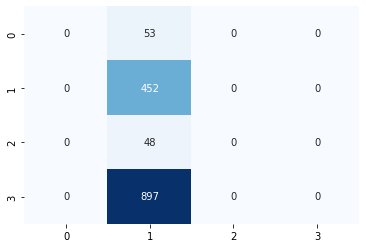

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ', ac)